# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Hee Su Chang

**Section**: 001
***

This assignment is due on Moodle by **5pm on Friday September 29th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 99 fair coins and 1 double-headed coin.  You grab one coin at random.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You toss your coin one time.  What is the probability that you toss a Heads? 

We can find the probability of tossing heads by finding:

P of grabbing fair coin $\times$ P of tossing heads with the coin + P of grabbing double coin $\times$ P of tossing heads with the coin

$\frac{99}{100} \times \frac{1}{2} + \frac{1}{100} \times 1  = \frac{101}{200}$

**Part B**: Suppose you toss a Heads.  What is the probability that the coin you chose from the box is double-sided? 

$P(H)$ : Probability of tossing a heads on a coin ($\frac{101}{200}$)

$P(D)$ : Probability of choosing a double-sided coin ($\frac{1}{100}$)

We can represent this problem with the expression $P(D \mid H)$

\begin{align}
P(D \mid H) &= \frac{P(D \cap H)}{P(H)} \\
            &= \frac{P(D \cup H) - P((D \cap H)^\complement) }{P(H)} \\
            &= \frac{P(D) + P(H) - P(H) - P(D \cap T)}{P(H)} \\
            &= \frac{\frac{1}{100} + \frac{101}{200} - \frac{101}{200} - 0}{\frac{101}{200}} \\
            &= \frac{2}{101}
\end{align}


**Part C**: Suppose you flip your coin $n$ times and record each outcome.  Obviously, if you flip Tails you know you picked a fair coin. But, if you flipped $n$ Heads in a row you would have a stronger belief that you in fact grabbed the double-headed coin.  What is the smallest value of $n$ Heads in a row that would make you believe that there's a better-than-half chance that the coin you grabbed is double-headed?  

$P(H^n)$ : Probability of getting heads n times in a row on a coin = $(\frac{99}{100} \times (\frac{1}{2})^n + \frac{1}{100} \times 1)$

We can solve this problem similar to how we solved Part B but by solving $P(D \mid H^n)$ instead.

\begin{align}
P(D \mid H^n) &= \frac{P(D \cap H^n)}{P(H^n)} \\
            &= \frac{P(D \cup H^n) - P((D \cap H^n)^\complement) }{P(H^n)} \\
            &= \frac{P(D) + P(H^n) - P(H^n) - P(D \cap T^n)}{P(H^n)} \\
            &= \frac{\frac{1}{100} + \frac{99}{100} \times (\frac{1}{2})^n - \frac{99}{100} \times (\frac{1}{2})^n - 0}{\frac{99}{100} \times(\frac{1}{2})^n + \frac{1}{100}} \\
            &= \frac{\frac{1}{100}}{\frac{99}{100} \times(\frac{1}{2})^n + \frac{1}{100}}
\end{align}

So we need to find when $\frac{\frac{1}{100}}{\frac{99}{100} \times(\frac{1}{2})^n + \frac{1}{100}} \ge 0.5$ now.

\begin{align}
\frac{\frac{1}{100}}{\frac{99}{100} \times(\frac{1}{2})^n + \frac{1}{100}} & \ge 0.5 \\
\frac{1}{50} & \ge \frac{99}{100} \times(\frac{1}{2})^n + \frac{1}{100} \\
\frac{1}{100} & \ge \frac{99}{100} \times(\frac{1}{2})^n \\
2^n & \ge 99 \\
n & \ge \frac{ln(99)}{ln(2)} \\
n & \ge 6.62935662008
\end{align}

Therefore, the smallest value of n Heads in a row that would make me believe there's a better-than-half chance that the coin I grabbed is double-headed is 7.



### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

The sample space is : (G M), (M G), (G G G M), (G G M G), (M M G M), (M M M G), (G G G G G M), (G G G G M G), (M M M M M G), (M M M M G M) ...

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

Given that the game ends after the first round, our sample space becomes (G M), (M G). Of these, the first outcome will give us W. So the probability of Team A winning in the first round is p(1-q), so $P(W \mid E)$ is p(1-q).

**Part C**: Explain why events $W$ and $T$ are independent. 

W and T are independent because being tied after the first round of sudden death penalty shots doesn't affect Team  A's probability p of making the shot or Team B's probability q of making the shot in the next round. Therefore event W isn't affected by the event T. Likewise, the probability that Team A wins doesn't affect the probability of them being tied after the first round of sudden death penalty shots because T is affected by the probability of Team A tying with Team B. A good way to prove this is to see if $P(W) = P(W \mid T)$ or $P(T) = P(T \mid W)$. If one of these statements is true, so is the other. And this tells us that W and T are independent. Though $P(W) = P(W \mid T)$ is hard to explain, we can explain $P(T) = P(T \mid W)$. The expression states that given that team A won the match, the probability of the game not ending after the first round is the same as the overall probability of the game being tied after the first round. This makes sense because the fact that team A won doesn't increase or decrease the probability that the game was tied after the first round. 

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

\begin{align}
P(W) &= p(1-q) + (2pq - p - q +1) ~P(W \mid T) \\
     &= P(W \cap E) + \{ (1-q)(1-p) + pq \} \frac{P(W \cap T)}{P(T)} \\
     &= P(W \cap E) + P(T)~\frac{P(W \cap T)}{P(T)} \\
     &= P(E)~\frac{P(W \cap E)}{P(E)} + P(T)~\frac{P(W \cap T)}{P(T)} \\
     &= P(E)~P(W \mid E) + P(T)~P(W \mid T) \\
     &= P(W)
\end{align}

**Part E**: Use the fact from **Part C** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

\begin{align}
P(W) &= P(E) P(W \mid E)+P(T) P(W \mid T) \\
P(W) - P(T) P(W \mid T) &= P(E) P(W \mid E) \\
P(W) - P(T) P(W) &= P(E) P(W \mid E) \\
(1-P(T))P(W) &= P(E) P(W \mid E)  \\
P(E)P(W) &= P(E) P(W \mid E) \\
P(W) &= P(W \mid E) \\
P(W) &= p(1-q)
\end{align}

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

Part B and Part E are the same because both event E is the opposite of T. And since this set of events are independent from event W, the answers are the same. Ultimately, the only things that influence the probability of team A are the probability of team A making its shot and the probability of team B making its shot.

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

We went this route instead of computing P(W) because trying to compute P(W) directly would mean finding the probability of W given the round ended in the first round and adding the probability of W given the round ended in the second round, and then the third round, and on and on. The route we went lets us leverage the fact that W is independent from E and T to find a simpler approach. We are able to find that the probability of team A winning doesn't reflect on the probability of whether they tie in any of the rounds.

### [25 points] Problem 3 
***

After Intro. Data Science lets out for the day, there are a bunch of different locations that Dan and Chris individually end up at.  Sometimes they go get dinner at the UMC ($~U~$) or coffee at Starbucks ($~S~$). Sometimes they go straight to their vehicles in the parking lot ($~P~$) and head home.  And sometimes they go back to their respective offices in the Engineering Center ($~E~$) or Fleming ($~F~$) to work. You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on the linked [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf).

Now, on a Wednesday after a particularly grueling start to the week, Dan and Chris leave class at Muenzinger in a bit of a daze and just sorta wander randomly between their usual haunts.  Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along (again, see the [map](https://www.cs.colorado.edu/~ketelsen/files/courses/csci3022/hmwk/hmwk02/campus_map.pdf)) with equal probability. 

**Part A**: Compute (by hand) the probability that Chris ends up at the Engineering Center after first visiting one other location after leaving Muenzinger. 

The sample space for Part A and Part B is the list of possible 2 destination paths: MSM,MSU,MUS,MUM,MUE,MUF,MEM,MEU,MEP,MEF,MPE,MPM (12 total)

The paths that Chris ends up at the Engineering Center after visiting one other location after leaving Muenzinger are: MUE,MPE

Therefore, the probability is 1/6

**Part B**: Compute (by hand) the probability that Dan ends up at the UMC _either_ as his first _or_ second location visited after leaving Muenzinger. 

The sample space for Part B is shared above.

The paths that Dan ends up at the UMC either as his first or second location are: MSU,MUS,MUM,MUE,MUF,MEU

Therefore the probability is 1/2

**Part C**: Suppose that Chris goes back to his office in the Engineering Center and Dan goes back to his office in Fleming.  Later that night they both leave their offices and wander around. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on their second location visited? 

The sample space for Part C is the number of two-destination paths Chris can take multiplied by the two-destination paths Dan can take. This is because for every one one path Dan can take, we need to account every path Chris can take to assess how many total unique path combinations the two can take. This, after a lot of tracing paths, turns out to be $12 \times 8$. Chris can take 12 paths total and Dan can take 8. Of these, it turns out they end up at the same location 15 times.

Therefore the probability is 15/96

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [2]:
Graph = {'F':['U', 'E'], 'E':['M', 'U', 'P', 'F'], 'P':['E', 'M'], 'M':['S', 'U', 'E', 'P'], 'U':['S', 'M', 'E', 'F'], 'S':['M', 'U'], 'F':['U', 'E']}
A_total = 0
A_engin = 0
B_umc = 0
for i in Graph['M']:
    for j in Graph[i]:
        A_total = A_total + 1
        if j == 'E':
            A_engin = A_engin + 1
        if j == 'U' or i == 'U':
            B_umc = B_umc + 1
            
    
print('Part A: ' + str(A_engin) + '/' + str(A_total))
print('Part B: ' + str(B_umc) + '/' + str(A_total))      

C_total = 0
C_meet = 0
for i in Graph['E']:
    for j in Graph[i]:
        for a in Graph['F']:
            for b in Graph[a]:
                C_total = C_total + 1
                if b == j:
                    C_meet = C_meet + 1
print('Part C: ' + str(C_meet) + '/' + str(C_total))     

Part A: 2/12
Part B: 6/12
Part C: 15/96


For this problem I have created a graph representation using a dictionary of key-list pairs. Each key corresponds to a location. Each list holds the neighbors of the location of the corresponding key that it can immideately reach.

For part A and part B, I am simulating someone visiting all the neighbors of 'M' (Meunzinger). Then from each of these neighbors, I visit all the neighbors of that neighbor. I can't how many times we do this to get the total number of paths Chris or Dan could go from Meunzinger and visiting one other location before their final destination. We are looping through each of the neighbor paths just once so we don't need to worry about duplicate of the same paths. Then once we reach that third node in the path, for each of these possible paths, I do two things. First, I check if my final destination is the engineering center. In which case I add 1 to the number of paths that end at the engineering center for Part A. Then, I check if the path I took involved me going to the UMC at all. If so, I add 1 to the number of paths that involve me going to the UMC. Dividing each of these variables by the total number of possible paths give me the desired probabilties.

For part C, I simulate Chris going from the engineering center to all possible paths that take one other location similar to part A and B. However, this time around, once Chris gets to his destination at each possible path, I have Dan go from Fleming to all the possible paths he can take. This is so that for every one possible path Chris takes, I'm counting all the different paths Dan can take. Once Dan is at the end of each of his possible paths, I check if Chris and Dan are in the same place. This doesn't exactly simulate the situation perfectly because Chris and Dan in my code aren't walking their paths simultaneously. Instead, by simulating Chris walking one possible path and then iterating through each of Dan's possible paths, I can still find out the proper probability since we are only looking at if they meet at the end. 

### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50, \$100, or \$200, or pay the bank \$100 or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [3]:
def miniopoly_turn(state, cash):
    die = np.random.randint(1, 7, size = 2)
    go = die[0] + die[1]
    if state == -1:
        if die[0] == die[1]:
            state = 10 + go
        else:
            cash = cash - 10
    else:    
        state = state + go
    if state >= 40:
        state = state % 40
        cash = cash + 200
    if state == 2 or state == 7 or state ==17 or state == 22 or state == 33 or state == 36:
        cards = [50, 100, 200, -100, -150]
        cash = cash + cards[np.random.randint(0, 5)]
    elif not state == 0 and not state == 10 and not state == 30 and not state == -1:
        cash = cash - state
    elif state == 30:
        state = -1
    if cash <= 0:
        cash = 0
    return state, cash 

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

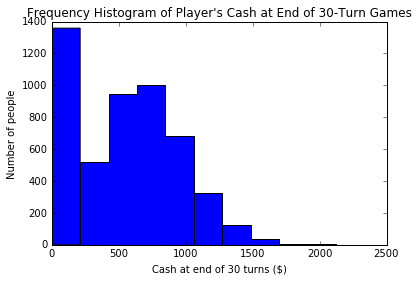

In [4]:
results = []
for i in range(5000):
    (state, cash) = (0, 200)
    for j in range(30):
        (state, cash) = miniopoly_turn(state, cash)
        if cash == 0:
            break
    results.append((state, cash))
    
plt.hist([x[1] for x in results])
plt.title("Frequency Histogram of Player's Cash at End of 30-Turn Games")
plt.xlabel("Cash at end of 30 turns ($)")
plt.ylabel("Number of people")
plt.show()

**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [5]:
bankrupt = 0
for i in range(5000):
    (state, cash) = (0, 200)
    for j in range(30):
        (state, cash) = miniopoly_turn(state, cash)
        if cash == 0:
            break
    if cash == 0:
        bankrupt = bankrupt + 1
print('Probability that player goes bankrupt in first 30 turns: '+ str(bankrupt/5000))

Probability that player goes bankrupt in first 30 turns: 0.235


**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [6]:
bankruptCon = 0
convict = 0
for i in range(5000):
    (state, cash) = (0, 200)
    jailed = False
    for j in range(30):
        (state, cash) = miniopoly_turn(state, cash)
        if state == -1:
            jailed = True
        if cash == 0 and jailed:
            bankruptCon = bankruptCon + 1
            break
    if jailed == True:
        convict = convict + 1
print('Probability that player goes bankrupt in first 30 given they went to Jail at least once: '+str(bankruptCon/convict))

Probability that player goes bankrupt in first 30 given they went to Jail at least once: 0.1823224852071006


**Part E**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they passed **Go** two or more times.  Is a player more or less likely to go bankrupt if they've managed to pass **Go** at least twice?

In [7]:
passedgotwice = 0
passedgotwiceandstillbroke = 0
for i in range(5000):
    passedgo = 0
    (state, cash) = (0, 200)
    for j in range(30):
        prevstate = state
        (state, cash) = miniopoly_turn(state, cash)
        if not state == -1 and prevstate > state:
            passedgo = passedgo + 1
        if cash == 0:
            break
    if passedgo >= 2:
        passedgotwice = passedgotwice + 1
        if cash == 0:
            passedgotwiceandstillbroke = passedgotwiceandstillbroke + 1
print('Probability that a player goes bankrupt in the first 30 turns given that they passed Go two or more times: ' + str(passedgotwiceandstillbroke/passedgotwice))

Probability that a player goes bankrupt in the first 30 turns given that they passed Go two or more times: 0.01605801605801606


### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan and Chris have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [8]:
dfLog = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
dfLog.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
0,10,23,33,1,13,22,31,0,6,15,...,437,427,409,380,343,593,582,561,530,fake
1,4,8,15,21,29,38,3,9,18,25,...,595,584,684,657,622,819,805,705,673,fake
2,9,17,23,31,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,real
3,7,10,16,22,31,0,6,13,16,23,...,285,275,265,265,239,202,398,385,362,real
4,11,23,33,39,39,39,39,39,39,39,...,0,0,0,0,0,0,0,0,0,fake


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [9]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C12,C13,C14,C15,C16,C17,C18,C19,C20,Game
995,5,13,20,22,32,38,7,15,28,0,...,443,420,393,358,558,408,392,364,326,NaN
996,8,14,18,24,32,39,6,10,14,21,...,158,119,310,292,269,240,290,484,470,NaN
997,7,14,19,23,33,1,8,15,26,38,...,497,484,465,436,486,686,586,571,545,NaN
998,5,13,22,29,38,7,16,27,37,8,...,547,520,620,817,801,778,978,1177,1164,NaN
999,8,13,23,30,30,30,22,28,34,38,...,536,513,482,682,674,660,639,613,579,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [10]:
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("https://raw.githubusercontent.com/chrisketelsen/csci3022/master/hmwk/hmwk02/game_log.csv")
    
    dfPredict.loc[:, "Prediction"] = "real"
    
    for index, row in dfPredict.iterrows():
        jailCnt = 0
        sum = 0
        for i in range(1, 20):
            dif = 0
            if dfPredict.iloc[index, i] > dfPredict.iloc[index, i - 1]:
                dif = int(dfPredict.iloc[index,i]) - int(dfPredict.iloc[index, i - 1])
            if dif > 12:
                dfPredict.loc[index, 'Prediction'] = "fake"
            state = dfPredict.iloc[index, i]
            if state == 2 or state == 7 or state ==17 or state == 22 or state == 33 or state == 36:
                dif = dfPredict.iloc[index, i + 20] - dfPredict.iloc[index, i + 19]
                if not (dif == 50 or dif == 100 or dif == 200 or dif == -150 or dif == -100):
                    dfPredict.loc[index, 'Prediction'] = "fake"
            if i < 4 and dfPredict.iloc[index, i + 20] == 0:
                dfPredict.loc[index, 'Prediction'] = "fake"
            if state == 30:
                jailCnt = jailCnt + 1
        if sum/20 >= 700:
            dfPredict.loc[index, 'Prediction'] = "fake"
        if dfPredict.iloc[index, 39] >= 700:
            dfPredict.loc[index, 'Prediction'] = "fake"
            
    return dfPredict 

In [11]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))

In [12]:
score(predict_game_log())

accuracy on labeled data: 0.66


Rules:

I based a large part of my predictions on checking if our standard rules were being followed. I noticed in a few "fake" rows that the state would go from 10 to 23, which is bigger than just the sum of two dice (6-faced). So, I checked all the rows to see if any also went more than 12 at a time. I also checked every time the state was 2 or 7 or 17 or 22 or 33 or 36 and checked if the change in cash matched the cards that we had because I thought it was possible for Fakeopoly to use different cards or pull cards at different states.

Patterns:

I noticed that some "fake" games ended in bankrupt very early in the game. While most of the "real" games that went bankrupt only went bankrupt after at least 4, turns, some "fake" games ended in 3 turns. This may have to do with the fact that Fakeopoly allowed players to move more at a time, resulting in earlier costs of high-state landings.

Probability:

I observed a lot of histograms. I would compare the same type of data for real and fake. Below are some of the histograms I found somewhat worth mentioning. 

The two histograms in Fig.1 show the distribution of the cash a player held at the end of each 20-turn game. As you can see, the real games had more a higher concentration of players that ended with 0-100 dollars while the fake games expanded out more. The wealthy people tended to be more wealthy in the fake games. So, I found a reasonable cutoff range where mainly "fake" games populated and labeled any in that range as fake in my predictions.

I used a similar reasoning using data as shown in Fig.2. This time, I used the average amount of cash the player held throughout the entire course of the game. I also found fake games had a higher number of wealthier outliers. So, I labeled those in this rnge fake as well. Many in this range that I labeled fake may very well have been in the same set as those I labeled fake in Fig.1 but this still raised my accuracy a little.

Next, I was going to do certain things with convict (those who were in jail) statistics. I thought the people who had been in jail would offer a more diverse view to how the different rules would affect them. However, as you can see in Fig. 3, there wasn't enough data so I ended up abandoning the use of this data.


Before I started looking at the histograms, I initially tried a bunch of random rules of prediction and actually got a slightly higher accuracy than I have now. However, none of those were from any significant exploration and analysis, so I disregarded them. In the method I have taken, though my overall accuracy is lower, I believe I have minimized the number of real games being falsely labeled fake. Depending on the circumstances, it may be better to have lower overall accuracy and avoid mislabeling things that are otherwise thought false than giving leiway to mislabeling for better overall accuracy. One such example would be if we were to use machine learning and AI to determine someone guilty or innocent on a charged crime where people are innocent until proven otherwise. We don't want the risk of sending someone to prison for life.


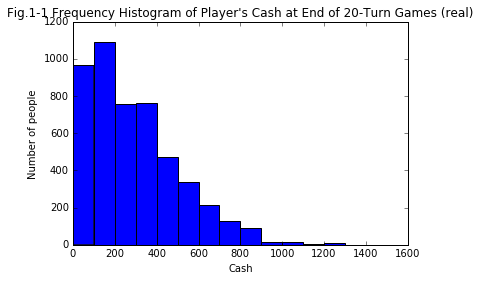

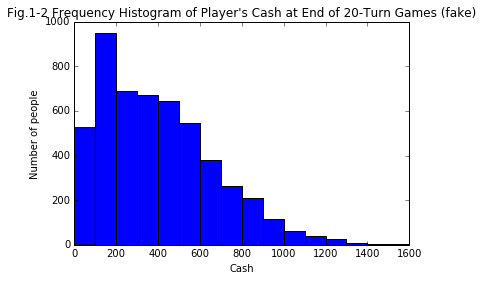

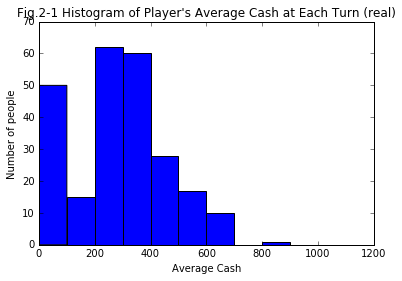

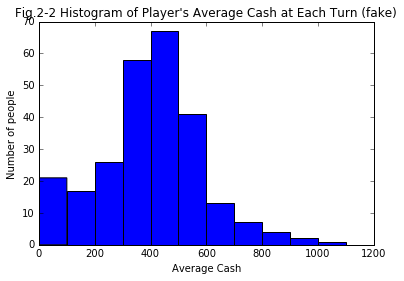

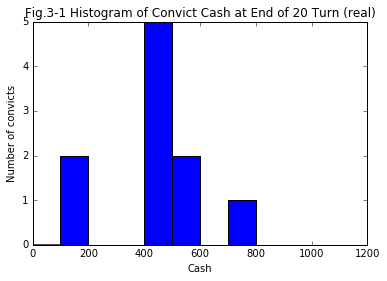

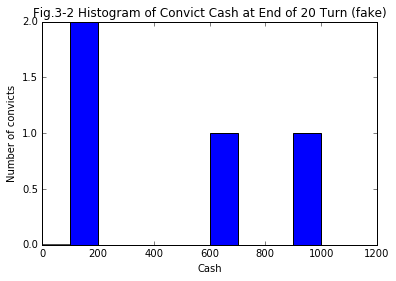

In [13]:
states_real = []
states_fake = []
cash_real = []
cash_fake = []
cashmean_real = []
cashmean_fake = []
burgularcash_real = []
burgularcash_fake = []
for index, row in dfLog.iterrows():
    sum = 0
    convict = False
    if dfLog.loc[index, 'Game'] == 'real':
        for i in range(0, 20):
            if dfLog.iloc[index, i] == 30:
                convict = True
            states_real.append(dfLog.iloc[index, i])
        for i in range(20, 40):
            cash_real.append(dfLog.iloc[index, i])
            sum = sum + dfLog.iloc[index, i]
        cashmean_real.append(sum/20)
        if convict:
            burgularcash_real.append(sum)
    if dfLog.loc[index, 'Game'] == 'fake':
        for i in range(0, 20):
            if dfLog.iloc[index, i] == 30:
                convict = True
            states_fake.append(dfLog.iloc[index, i])
        for i in range(20, 40):
            cash_fake.append(dfLog.iloc[index, i])
            sum = sum + dfLog.iloc[index, i]
        cashmean_fake.append(sum/20)
        if convict:
            burgularcash_fake.append(sum)
        
plt.hist(cash_real, range=[0, 1600], bins = 16)
plt.title("Fig.1-1 Frequency Histogram of Player's Cash at End of 20-Turn Games (real)")
plt.xlabel("Cash")
plt.ylabel("Number of people")
plt.show()
           
plt.hist(cash_fake, range=[0, 1600], bins = 16)
plt.title("Fig.1-2 Frequency Histogram of Player's Cash at End of 20-Turn Games (fake)")
plt.xlabel("Cash")
plt.ylabel("Number of people")
plt.show()

plt.hist(cashmean_real, range=[0, 1100], bins = 11)
plt.title("Fig.2-1 Histogram of Player's Average Cash at Each Turn (real)")
plt.xlabel("Average Cash")
plt.ylabel("Number of people")
plt.show()

plt.hist(cashmean_fake, range=[0, 1100], bins = 11)
plt.title("Fig.2-2 Histogram of Player's Average Cash at Each Turn (fake)")
plt.xlabel("Average Cash")
plt.ylabel("Number of people")
plt.show()

plt.hist(burgularcash_real, range=[0, 1100], bins = 11)
plt.title("Fig.3-1 Histogram of Convict Cash at End of 20 Turn (real)")
plt.xlabel("Cash")
plt.ylabel("Number of convicts")
plt.show()

plt.hist(burgularcash_fake, range=[0, 1100], bins = 11)
plt.title("Fig.3-2 Histogram of Convict Cash at End of 20 Turn (fake)")
plt.xlabel("Cash")
plt.ylabel("Number of convicts")
plt.show()



**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 

One rule that could be different is the number of dice that are rolled to be summed up at each stage. I noticed in one of the "fake" labeled rows that the player jumped from 10 to 23. This indicates you can move more than 12 in one stage, which is different from our rules. The rate at which people move across the board seems much larger overall. Using this check gave me a jump in accuracy by 0.61, so I think this is a good prediction.

### Challenge Problem - Night Falls. A Storm Rolls In. Can You Cross The River?
***

In every homework assignment we'll give you a Challenge Problem.  Challenge Problems never need to be turned in (and in fact, will not be graded) but we encourage you to give them a shot (after completing the required homework problems) and discuss them with your classmates and your instructors. 

The following Challenge Problem was a [Riddler](https://fivethirtyeight.com/tag/the-riddler/) on [FiveThirtyEight](https://fivethirtyeight.com) a few years back. 

You’re on the north shore of a river, and want to cross to the south, via a series of 13 bridges and six islands, which you can see in the diagram below. But, as you approach the water, night falls, a bad storm rolls in, and you’re forced to wait until morning to try to cross. Overnight, the storm could render some of the bridges unusable — it has a 50 percent chance of knocking out each of the bridges. (The chance is independent for each bridge.)

<br>

![alt text](https://espnfivethirtyeight.files.wordpress.com/2016/01/roeder-riddler-diagram-11.png?w=575&h=449&quality=90&strip=info)

<br>

What’s the probability you will be able to cross the river in the morning? (You have no boat, can’t swim, can’t fix the bridges, etc. No tricks.)